# Amazon product Scraper using Beautifulsoap

In [1]:
import requests
from bs4 import BeautifulSoup
#for database we will use sqlite3 library
import sqlite3

<h3>We need this user agent to bypass restrictions of amazon to scrape the products</h3>

In [2]:
headers = { "user-Agent": 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'}

In [3]:
#Here we will add the url of the product that we want to parse

In [4]:
url = 'https://www.amazon.de/-/en/Fossil-FS4656IE-Chronograph-Quartz-Leather/dp/B07TCQRRWR/'

In [5]:
page = requests.get(url, headers=headers)

In [6]:
page

<Response [200]>

In [7]:
#If we want to see the page content we need to use .content

b'<!doctype html><html lang="en-gb" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.s
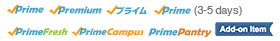
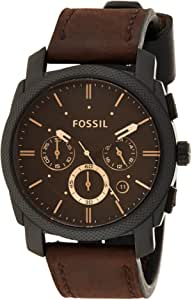

In [8]:
page.content

In [9]:
soup = BeautifulSoup(page.content, features="lxml")

In [ ]:
#It will beautify the content
#print(soup.prettify)

In [ ]:
#Here we parse the name of product and by using the strip() function we can get rid of extra html code or spaces

In [ ]:
product_name = soup.find(id='productTitle').get_text().strip()
product_name

In [ ]:
#Here we parse the product ASIN and it's little tricky

In [ ]:
product_asin = soup.select_one("li:nth-child(5) .a-text-bold+ span").get_text().strip()
print('ASIN: ',product_asin)

In [ ]:
#For the timestamp we have different ways 1). we can use system date and time using python other we can use database date and time function

In [ ]:
from datetime import datetime
dateTimeObj = datetime.now()
print(dateTimeObj.year, '/', dateTimeObj.month, '/', dateTimeObj.day)
print(dateTimeObj.hour, ':', dateTimeObj.minute, ':', dateTimeObj.second)





## Database
### For this project we are using SQLite database 

In [ ]:

# Create a SQL connection to our SQLite database
con = sqlite3.connect('Amazon_db.sqlite')

In [ ]:
#Create the table and give the name of table attributes 

In [ ]:
cur = con.cursor()
cur.execute('CREATE TABLE if not exists amazon (product_name VARCHAR, product_asin VARCHAR, timestamp CHAR(100))')
con.commit()

In [ ]:
#Here we will insert the data and print all data

In [ ]:
#For timestamp we are using DateTime() function of SQLite

In [ ]:

con.execute("INSERT INTO amazon(product_name, product_asin, timestamp) values (?, ?,  DateTime('now', 'localtime'))", (product_name, product_asin))
con.commit()
cur = con.cursor()
cur.execute("SELECT * FROM amazon")
rows = cur.fetchall()
for row in rows:
    print(row)
#con.close()

In [ ]:
#If you want to delete record you can use this query

#cur.execute("DELETE FROM amazon WHERE product_asin='GARMIN'")

In [ ]:
#We can print the selected data by using this query

In [ ]:
con = sqlite3.connect('Amazon_db.sqlite')
cur = con.cursor()
cur.execute("SELECT product_name, timestamp FROM amazon WHERE product_asin='B07TCQRRWR'")
rows = cur.fetchall()
for row in rows:
    print(row)
con.close()

In [11]:
#Here we parse the name of product and by using the strip() function we can get rid of extra html code or spaces

In [12]:
product_name = soup.find(id='productTitle').get_text().strip()
product_name

"Fossil FS4656IE Men's Chronograph Quartz Watch with Leather Strap"

In [13]:
#Here we parse the product ASIN and it's little tricky

In [14]:
product_asin = soup.select_one("li:nth-child(5) .a-text-bold+ span").get_text().strip()
print('ASIN: ',product_asin)

ASIN:  B07TCQRRWR


In [15]:
#For the timestamp we have different ways 1). we can use system date and time using python other we can use database date and time function

In [16]:
from datetime import datetime
dateTimeObj = datetime.now()
print(dateTimeObj.year, '/', dateTimeObj.month, '/', dateTimeObj.day)
print(dateTimeObj.hour, ':', dateTimeObj.minute, ':', dateTimeObj.second)





2021 / 2 / 18
22 : 4 : 38


## Database
### For this project we are using SQLite database 

In [17]:

# Create a SQL connection to our SQLite database
con = sqlite3.connect('Amazon_db.sqlite')

In [18]:
#Create the table and give the name of table attributes 

In [19]:
cur = con.cursor()
cur.execute('CREATE TABLE if not exists amazon (product_name VARCHAR, product_asin VARCHAR, timestamp CHAR(100))')
con.commit()

In [20]:
#Here we will insert the data and print all data

In [21]:
#For timestamp we are using DateTime() function of SQLite

In [29]:

con.execute("INSERT INTO amazon(product_name, product_asin, timestamp) values (?, ?,  DateTime('now', 'localtime'))", (product_name, product_asin))
con.commit()
cur = con.cursor()
cur.execute("SELECT * FROM amazon")
rows = cur.fetchall()
for row in rows:
    print(row)
#con.close()

("Fossil FS4656IE Men's Chronograph Quartz Watch with Leather Strap", 'B07TCQRRWR', '2021-02-18 22:01:40')
("Fossil FS4656IE Men's Chronograph Quartz Watch with Leather Strap", 'B07TCQRRWR', '2021-02-18 22:02:40')
("Fossil FS4656IE Men's Chronograph Quartz Watch with Leather Strap", 'B07TCQRRWR', '2021-02-18 22:04:38')
("Fossil FS4656IE Men's Chronograph Quartz Watch with Leather Strap", 'B07TCQRRWR', '2021-02-18 22:05:40')


In [28]:
#If you want to delete record you can use this query

#cur.execute("DELETE FROM amazon WHERE product_asin='GARMIN'")

In [24]:
#We can print the selected data by using this query

In [30]:
con = sqlite3.connect('Amazon_db.sqlite')
cur = con.cursor()
cur.execute("SELECT product_name, timestamp FROM amazon WHERE product_asin='B07TCQRRWR'")
rows = cur.fetchall()
for row in rows:
    print(row)
con.close()

("Fossil FS4656IE Men's Chronograph Quartz Watch with Leather Strap", '2021-02-18 22:01:40')
("Fossil FS4656IE Men's Chronograph Quartz Watch with Leather Strap", '2021-02-18 22:02:40')
("Fossil FS4656IE Men's Chronograph Quartz Watch with Leather Strap", '2021-02-18 22:04:38')
("Fossil FS4656IE Men's Chronograph Quartz Watch with Leather Strap", '2021-02-18 22:05:40')
